# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [7]:
df = pd.read_csv('dados_tratadp_segunda_tentativa.csv', delimiter = ',')
df.head(10)

,genero,idoso,casado,dependentes,tempo_cliente,servico_internet,servico_seguranca,suporte_tecnico,streamingtv,tipo_contrato,metodo_pagamento,pagamento_mensal,total_pago,churn
0,female,False,True,False,1,dsl,no,no,no,month-to-month,electronic check,29.85,29.85,0
1,male,False,False,False,34,dsl,yes,no,no,one year,mailed check,56.95,1889.50,0
2,male,False,False,False,2,dsl,yes,no,no,month-to-month,mailed check,53.85,108.15,1
3,male,False,False,False,45,dsl,yes,yes,no,one year,bank transfer (automatic),71.45,1840.75,0
4,female,False,False,False,52,no,no internet service,no internet service,no internet service,one year,mailed check,71.45,1022.95,0
5,male,False,False,True,71,fiber optic,yes,no,yes,two year,bank transfer (automatic),71.45,7382.25,0
6,female,False,True,True,10,dsl,no,yes,no,month-to-month,credit card (automatic),71.45,528.35,1
7,female,False,False,False,21,fiber optic,no,no,no,month-to-month,electronic check,71.45,1862.90,0
8,male,True,False,False,1,dsl,no,no,no,month-to-month,electronic check,71.45,39.65,1
9,male,False,True,False,12,no,no internet service,no internet service,no internet service,one year,bank transfer (automatic),71.45,202.25,0


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [9]:
#Seu código aqui
df.describe()

,tempo_cliente,pagamento_mensal,total_pago,churn
count,2488.000000,2488.000000,2488.000000,2488.000000
mean,32.352090,66.342564,2290.087178,0.260048
std,24.636885,28.051718,2264.585643,0.438749
min,0.000000,18.400000,18.800000,0.000000
25%,8.000000,45.400000,402.337500,0.000000
50%,29.000000,71.450000,1402.900000,0.000000
75%,56.000000,87.712500,3867.162500,1.000000
max,72.000000,118.650000,8564.750000,1.000000


In [10]:
proporcao_churn = df['churn'].value_counts(normalize=True) * 100
print(proporcao_churn)

churn
0    73.995177
1    26.004823
Name: proportion, dtype: float64


Há muitos clientes novos e muitos que são fiés, a média do tempo de permanência dos clientes é de aproximadamente 32, com um desvio padrão de 24. A grande diferença entre o mínimo e o máximo sugere que há tanto clientes novos quanto clientes muito fiéis. Poderia ser interessante segmentar os clientes por tempo de permanência para entender o comportamento de cada grupo. 

Como a mediana do pagamento mensal é maior que a média, pode haver alguns clientes pagando valores muito baixos, puxando a média para baixo. 

A diferença entre a média e a mediana do total pago sugere que há clientes que gastam muito mais do que a maioria, aumentando o valor médio. Isso pode indicar a presença de planos mais caros ou pode ser um efeiro causado pela quantidade de tempo do cliente x tempo, como pudemos observar no tempo de cliente, há muitos clientes antigo.

Ao realizar uma análise inicial, podemos supor que o alto desvio do total pago se deve ao fato de que este valor é influenciado tanto pelo tempo de permanência do cliente na empresa quanto pelo seu gasto mensal. Como há possiveis outliers em ambas as variáveis, é possível que um esteja impulsionando o outro, o que contribui para a grande variação no total pago.

O churn está em 26%, o que é uma quantidade consideravel. Seria interessante investigar quais fatores influenciam o cancelamento e se há relação entre tempo de cliente, pagamento mensal e churn.

Há alguns clientes que pagaram muito pouco e outros que pagaram valores muito altos, o que pode indicar outliers.


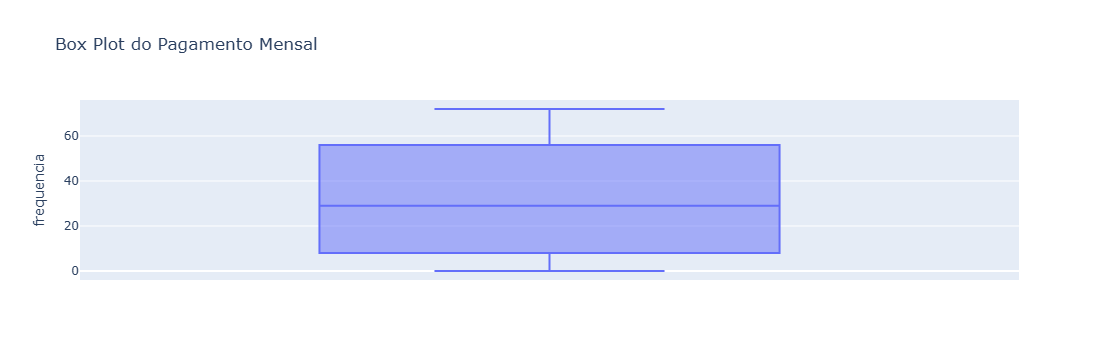

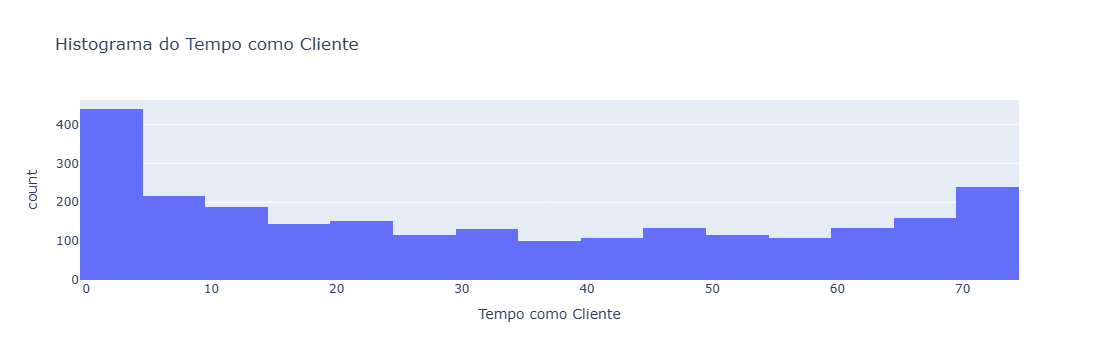

In [15]:
fig = px.box(df, y='tempo_cliente', title='Box Plot do tempo como cliente', labels={'tempo_cliente': 'frequencia'})
fig.show()


import plotly.express as px

fig = px.histogram(df, x='tempo_cliente', 
                   title='Histograma do Tempo como Cliente',
                   labels={'tempo_cliente': 'Tempo como Cliente'})
fig.show()



há a presença de muito cliente novos porém não são outliers mas talvez seja interessante seguimentar os resultados para ter uma análise do churn em clientes novose e clientes que já estão com a empresa a mais tempo

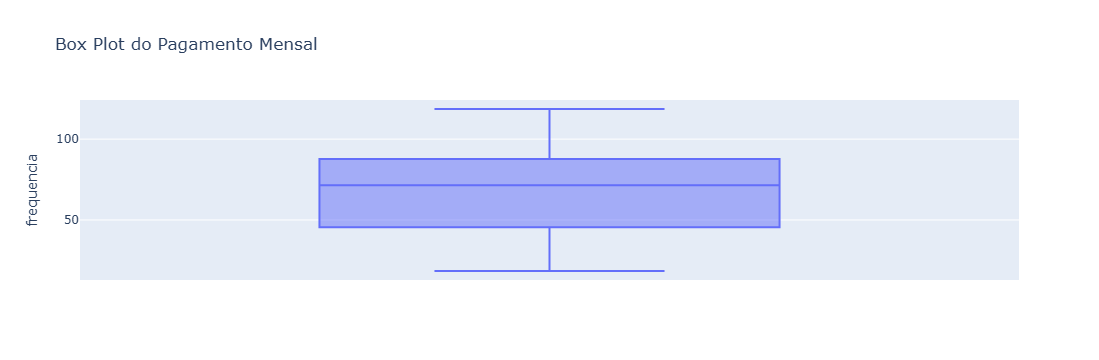

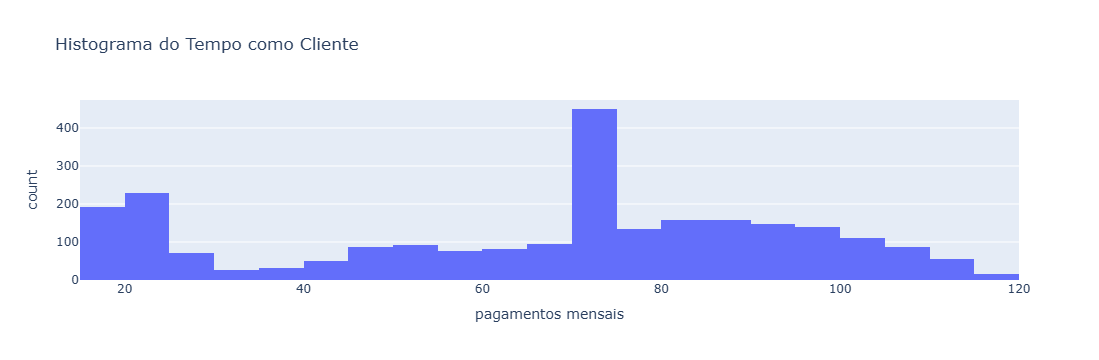

In [17]:
fig = px.box(df, y='pagamento_mensal', title='Box Plot do Pagamento Mensal', labels={'pagamento_mensal': 'frequencia'})
fig.show()


import plotly.express as px

fig = px.histogram(df, x='pagamento_mensal', 
                   title='Histograma do Tempo como Cliente',
                   labels={'pagamento_mensal': 'pagamentos mensais'})
fig.show()


Não há outliers, a grande concentração de clientes que pagam valores entre 70 e 75 se deve ao fato de termos substituido os nulos pela mediana para não distorccer as análises, já que hávia muitos nulls e precisavamos do pagamento mensal para analisar nosso churn

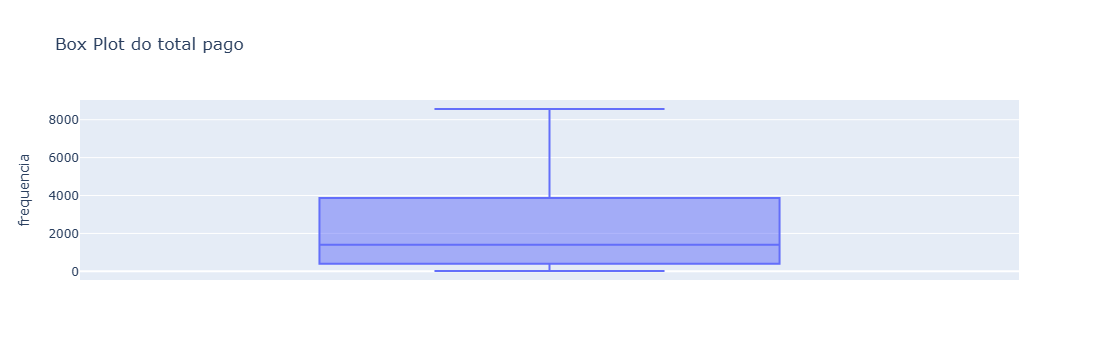

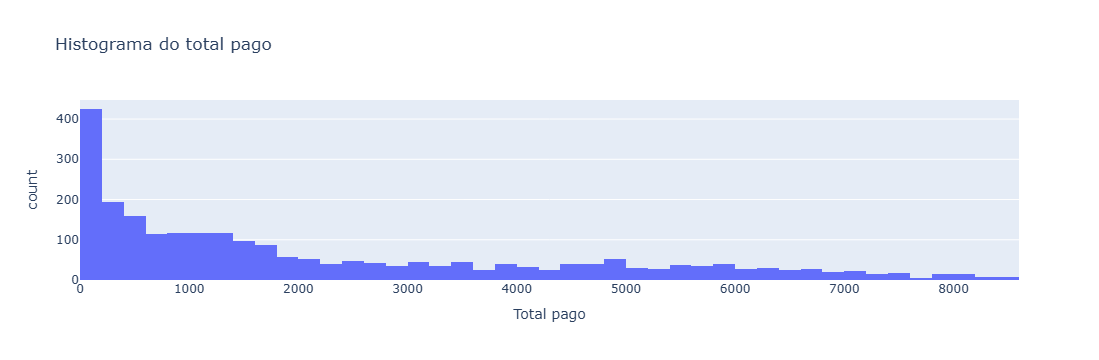

In [24]:
fig = px.box(df, y='total_pago', title='Box Plot do total pago', labels={'total_pago': 'frequencia'})
fig.show()



fig = px.histogram(df, x='total_pago', 
                   title='Histograma do total pago',
                   labels={'total_pago': 'Total pago'})
fig.show()


Há muito clientes que tiveram o total pago muito baixo, isso possivelmente se deve ao fato de haver muitos clientes novos, e o tempo que eles estão pagando é muito baixo e total pago envolve uma relação de tempo por gasto mensal

In [38]:
df[(df['total_pago'] < 200) & (df['tempo_cliente'] <= 4)]

,genero,idoso,casado,dependentes,tempo_cliente,servico_internet,servico_seguranca,suporte_tecnico,streamingtv,tipo_contrato,metodo_pagamento,pagamento_mensal,total_pago,churn
0,female,False,True,False,1,dsl,no,no,no,month-to-month,electronic check,29.85,29.85,0
2,male,False,False,False,2,dsl,yes,no,no,month-to-month,mailed check,53.85,108.15,1
8,male,True,False,False,1,dsl,no,no,no,month-to-month,electronic check,71.45,39.65,1
10,male,False,False,False,1,no,no internet service,no internet service,no internet service,month-to-month,mailed check,71.45,20.15,1
15,male,False,True,True,1,dsl,no,no,no,month-to-month,electronic check,71.45,30.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,male,False,False,True,1,dsl,yes,yes,no,month-to-month,bank transfer (automatic),70.45,70.45,0
2452,female,False,False,False,1,fiber optic,no,no,no,month-to-month,electronic check,77.15,77.15,1
2453,male,False,False,False,1,dsl,no,no,no,month-to-month,bank transfer (automatic),35.25,35.25,1
2470,female,False,True,False,2,dsl,no,no,no,month-to-month,electronic check,45.00,89.75,0


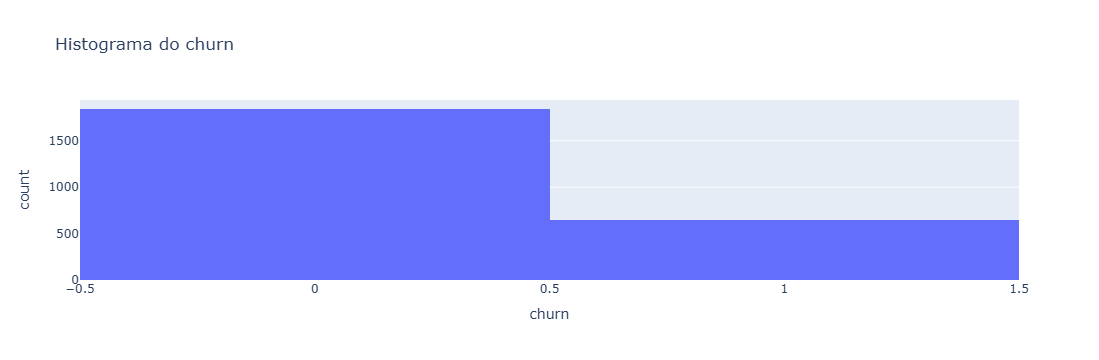

In [43]:
fig = px.histogram(df, x='churn', 
                   title='Histograma do churn',
                   labels={'churn': 'churn'})
fig.show()

Podemos ver que a quantidade média de churn é superior a 26%, seria interessante analizar qual é causa do churn e o seguinmento que ela representa



# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


Optamos por não realizar alterações nos dados, mesmo com a cauda da esquerda sendo significativamente maior que a média. Isso se justifica porque, conforme indicado pelo boxplot, não foram identificados outliers. A distribuição, apesar de assimétrica, parece ser uma característica válida dos dados. Será importante analisar se a assimetria está sendo influenciada pela quantidade de novos clientes, e talvez fazer a análise em cima de dois seguimentos distintos, os novos cliente e os fidelizados.

In [42]:
(df['total_pago'] < 200).sum()
df[(df['total_pago'] < 200) & (df['tempo_cliente'] <= 4)].shape[0]

print((df[(df['total_pago'] < 200) & (df['tempo_cliente'] <= 4)].shape[0] / (df['total_pago'] < 200).sum())*100)

86.11764705882354


Como podemos ver realmente os registros de pagamento baixo está relacionado com os novos clientes

Como vimos antes, e também podemos implicar por lógica, o tempo influencia no total pago, por isso quanto mais tempo passa maior será o total gasto, apentemente há muita conversão porém churn fez a quantidade de pessoas com total gasto maior diminuir ao longo do tempo

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

Análisando apenas o df de clientes que são novos podemos observar que quanto maior o tempo maior o total pago


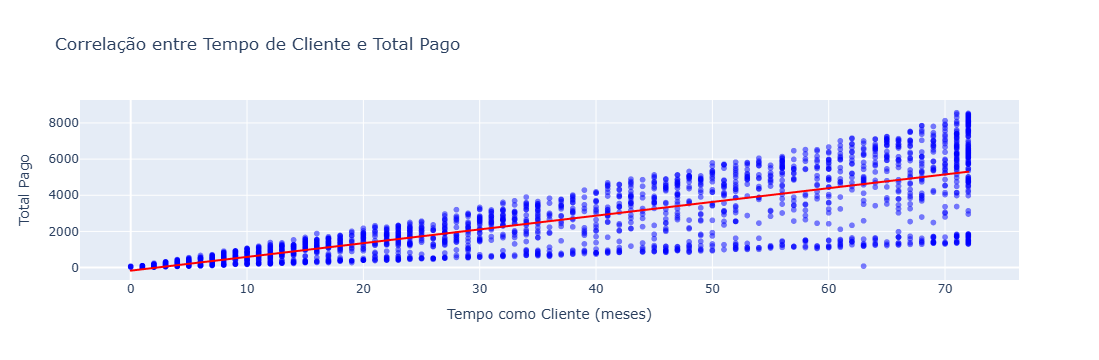

In [80]:

fig = px.scatter(df, 
                 x='tempo_cliente',  
                 y='total_pago',     
                 title="Correlação entre Tempo de Cliente e Total Pago", 
                 labels={'tempo_cliente': 'Tempo como Cliente (meses)', 'total_pago': 'Total Pago'},
                 trendline='ols') 


fig.update_traces(marker=dict(color='blue', opacity=0.5))  
fig.update_traces(line=dict(color='red', width=2))  

fig.show()

Anteriormente houve a suposição de que quanto maior o tempo como cliente maior é seu gasto total, apesar de comprovarmos que isso aumenta o total ganho, há varios clientes antigos que gastaram pouco, pode ser possivel que isso aconteça pela alta taxa de churn, pois como haviamos visto a uma queda na quandida de clientes com forme o tempo passou

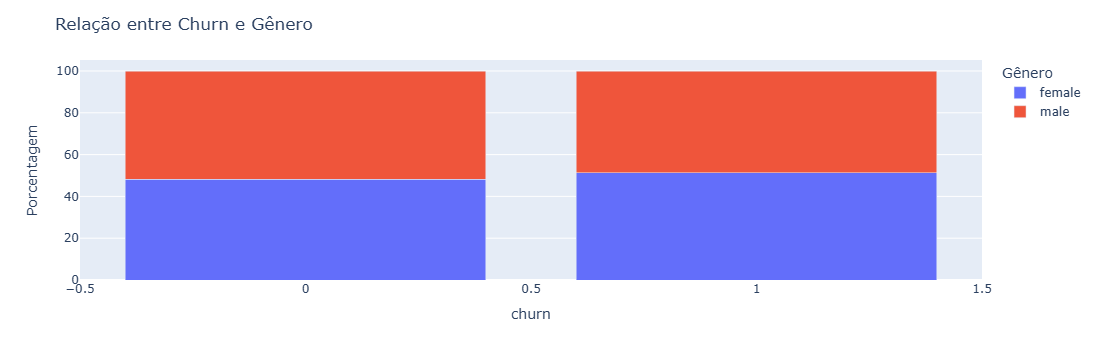

In [83]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['churn', 'genero']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='churn', y='percent', color='genero', barmode='stack',
             labels={'churn': 'churn', 'percent': 'porcentagem', 'genero': 'gênero'})

fig.update_layout(title="Relação entre Churn e Gênero",
                  yaxis_title="Porcentagem",
                  legend_title="Gênero")

fig.show()


Podemos observar a proporção de churn entre os sexos está bem equilibrada, as mulheres representam uma parcela maior de churn mais é de menos de 2%

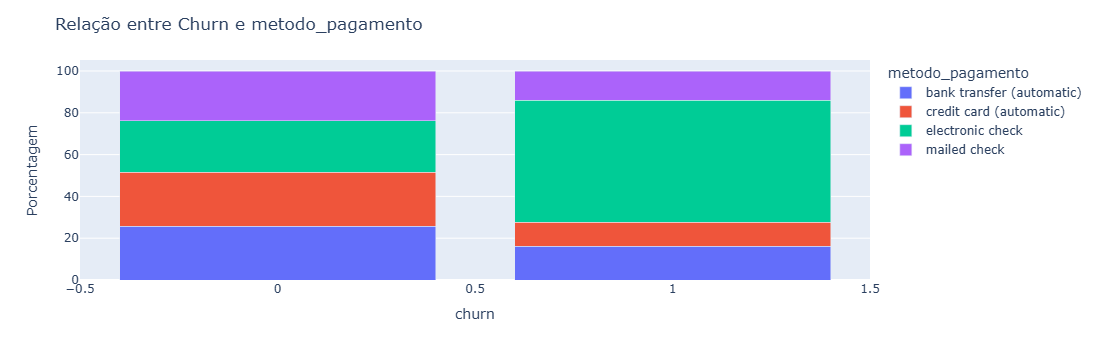

In [84]:
# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['churn', 'metodo_pagamento']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='churn', y='percent', color='metodo_pagamento', barmode='stack',
             labels={'churn': 'churn', 'percent': 'porcentagem', 'metodo_pagamento': 'metodo_pagamento'})

fig.update_layout(title="Relação entre Churn e metodo_pagamento",
                  yaxis_title="Porcentagem",
                  legend_title="metodo_pagamento")

fig.show()

Pode se observar que paga com cartão de crédito tem um baixo nivel de churn enquanto o cheque eletronico tem um nivel muito maior de churn

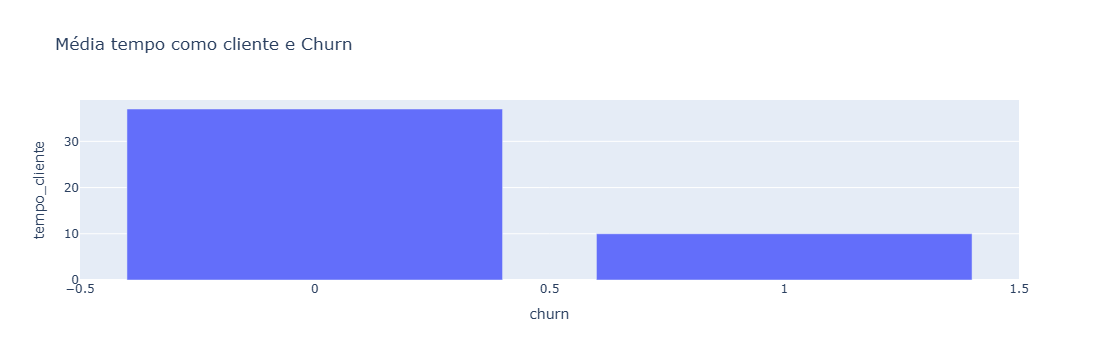

In [92]:
mediana = df.groupby('churn')['tempo_cliente'].median().reset_index()

# Criar gráfico de barras
fig = px.bar(mediana, x='churn', y='tempo_cliente',
             title='Média tempo como cliente e Churn')

fig.show()

Podemos ver que clientes com menos tempo tem um chance de churn maior, se olharmos para o grafico de tempo como cliente poderemos ver que há muitos cliente com tempo inferior a 4 meses, e vai diminuindo até o ponto médio e após isso a quantidade de clientes com mais tempo de casa, após isso ele volta a subir, isso indica que clientes fidelizados mais fidelizado tendem a se manter clientes

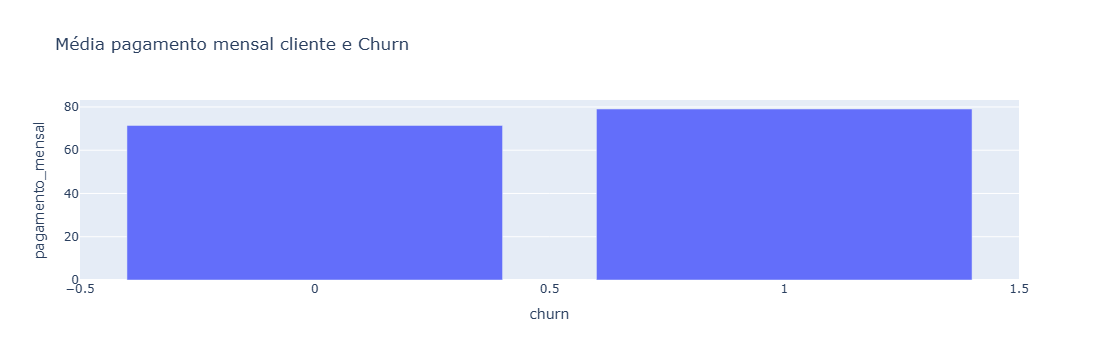

In [88]:
mediana = df.groupby('churn')['pagamento_mensal'].median().reset_index()

# Criar gráfico de barras
fig = px.bar(mediana, x='churn', y='pagamento_mensal',
             title='Média pagamento mensal cliente e Churn')

fig.show()

Isso nos leva a crer que o motivo do churn não está muito relacionado a valores elevador, porém o valor mensal influencia o churn

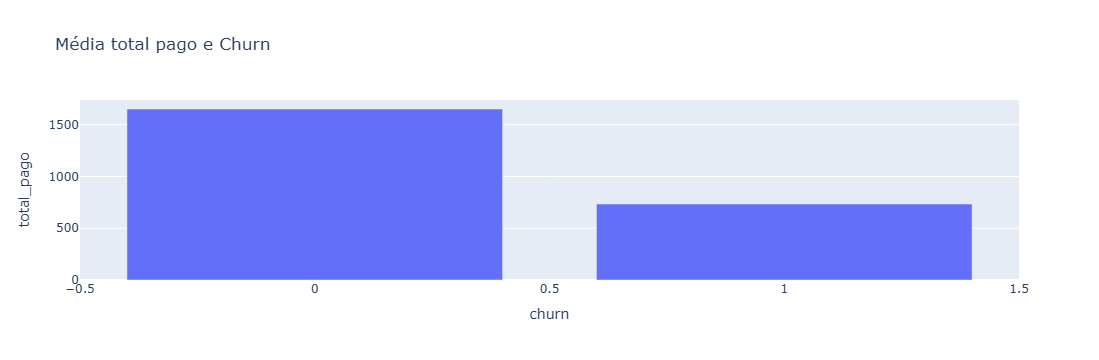

In [90]:
mediana = df.groupby('churn')['total_pago'].median().reset_index()

# Criar gráfico de barras
fig = px.bar(mediana, x='churn', y='total_pago',
             title='Média total pago e Churn')

fig.show()

Esse gráfico ilustra a relação entre o total pago e o tempo como cliente. Observamos que, entre os clientes fidelizados há mais tempo, o churn é mais baixo. Isso indica que, quanto maior o tempo de fidelização, maior tende a ser o gasto total do cliente. Consequentemente, clientes que pagaram valores mais altos apresentam menor taxa de churn.

Ao analisarmos o gráfico de dispersão entre tempo como cliente e valor total pago, percebemos que o tempo tem influência no total gasto. No entanto, também há clientes com um longo tempo de fidelização, mas com um total pago relativamente baixo. Isso pode indicar a presença de clientes inativos ou que passaram por períodos de inatividade.